
Hidden Markov Model in python - learn prams from data 
-----------------
[Theory explanation: Hidden Markov Models - Bert Huang](https://www.youtube.com/watch?v=9yl4XGp5OEg) || 
[More scary Code - PyTorch](https://colab.research.google.com/drive/1IUe9lfoIiQsL49atSOgxnCmMR_zJazKI) 

 <img src="https://images.slideplayer.com/16/4970773/slides/slide_4.jpg" alt="" width="1000" height="600">

## Preprocessing and baseline

In [1]:
from copy import copy, deepcopy
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from collections import Counter
from scipy import stats
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import mnist
%matplotlib inline

from hmmlearn.hmm import GaussianHMM, MultinomialHMM

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
X_train = mnist.train_images()
y_train = mnist.train_labels()
X_test = mnist.test_images()
y_test = mnist.test_labels()

y_train = np.array(y_train)
y_test = np.array(y_test)

# Normalize the images.
X_train = (X_train / 255) - 0.5
X_test = (X_test / 255) - 0.5

# Flatten the images.
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

print(X_train.shape) # (60000, 784)
print(X_test.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [3]:
# Apply a learning algorithm
print("Applying a learning algorithm...\n")
clf = RandomForestClassifier(n_estimators=50,n_jobs=4)
clf.fit(X_train, y_train)

# Make a prediction
print("Making predictions...\n")
y_pred = clf.predict(X_test)

# Evaluate the prediction
print("Evaluating results...\n")
print("Accuracy: \t", clf.score(X_test, y_test))

Applying a learning algorithm...



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

Making predictions...

Evaluating results...

Accuracy: 	 0.9682


## HMM



In [4]:
## load
with open("model 20k-20iter.pkl", "rb") as file: model = pickle.load(file)

In [5]:
## Run 
# model = GaussianHMM(n_components=10, covariance_type="full", n_iter = 10)
# model.fit(X_train[:50000]) # max: 60000

In [6]:
data = model.sample(15, random_state = None) #random_state/seed is inherited
print(data[0][0].shape) 

(784,)


5

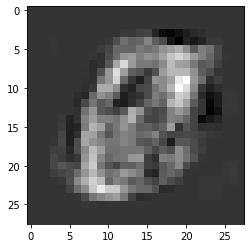

In [7]:
idx = np.random.randint(15)
point = data[0][idx]# X_train[0]
idx
plt.imshow(point.reshape((28, 28)), cmap='gray')
plt.show()

### Match classes

In [15]:
ls = [] 
for i in range(10):
    pred = model.predict(X_test[y_test == i])
    true_class = Counter(pred).most_common(3)
    print(f'Model class: {i} - most common elem(s): {true_class}.\t  Our models {i}, is considered a {true_class[0][0]}')
    ls.append([true_class[0][0], true_class[1][0], true_class[2][0]])

print(ls)

Model class: 0 - most common elem(s): [(8, 601), (6, 279), (0, 43)].	  Our models 0, is considered a 8
Model class: 1 - most common elem(s): [(7, 839), (2, 220), (8, 43)].	  Our models 1, is considered a 7
Model class: 2 - most common elem(s): [(5, 537), (0, 252), (8, 149)].	  Our models 2, is considered a 5
Model class: 3 - most common elem(s): [(0, 468), (8, 245), (9, 128)].	  Our models 3, is considered a 0
Model class: 4 - most common elem(s): [(8, 347), (4, 199), (2, 161)].	  Our models 4, is considered a 8
Model class: 5 - most common elem(s): [(8, 348), (9, 292), (0, 156)].	  Our models 5, is considered a 8
Model class: 6 - most common elem(s): [(3, 589), (8, 279), (5, 29)].	  Our models 6, is considered a 3
Model class: 7 - most common elem(s): [(1, 628), (4, 212), (2, 82)].	  Our models 7, is considered a 1
Model class: 8 - most common elem(s): [(8, 355), (9, 189), (2, 152)].	  Our models 8, is considered a 8
Model class: 9 - most common elem(s): [(1, 327), (2, 310), (4, 246)]

In [16]:
rankings = deepcopy(ls)
assume = [i.pop(0) for i in ls]  
second_choice = [i.pop(0) for i in ls]   
third_choice = [i.pop(0) for i in ls]

    
print(assume)
print(second_choice)
print(third_choice)

print(rankings)  

[8, 7, 5, 0, 8, 8, 3, 1, 8, 1]
[6, 2, 0, 8, 4, 9, 8, 4, 9, 2]
[0, 8, 8, 9, 2, 0, 5, 2, 2, 4]
[[8, 6, 0], [7, 2, 8], [5, 0, 8], [0, 8, 9], [8, 4, 2], [8, 9, 0], [3, 8, 5], [1, 4, 2], [8, 9, 2], [1, 2, 4]]


In [17]:
# manual changes
# ls = [8, 7, 5, 0, 4, 9, 3, 1, 8, 2]

def evaluate(mapping, label):

    score = 0
    points = np.where(y_test==label)[0] # as i recall, this is the same as `y_test == i` 
    predictions = model.predict(X_test[points])

    for idx, pred in enumerate(predictions):
        if(idx ==0):
            print(f'HMMs pred is {pred}. mapping[pred] is {mapping[pred]}, check if = {label}?')
        if(mapping[pred] == label):
            score += 1
    
    acc = score/len(points) * 100
    print(f'Mapping: {mapping}')
    print(f'Accuracy with our mapping: {acc:.2f}%')
    return acc

print(assume)

for i in range (10): 
    
    #select choices
    sec = deepcopy(assume)
    sec[i] = second_choice[i]

    thir = deepcopy(assume)
    thir[i] = third_choice[i]
    
    # compute & compare
    label = i # assume[i]
    best = np.argmax([evaluate(assume, label = label), evaluate(sec, label = label), evaluate(thir, label = label)])
#     best = np.argmax([evaluate(assume, label = i), evaluate(sec, label = i), evaluate(thir, label = i)]) # first attempt

    #update
    assume[i] = rankings[i][best]
assume

[8, 7, 5, 0, 8, 8, 3, 1, 8, 1]
HMMs pred is 9. mapping[pred] is 1, check if = 0?
Mapping: [8, 7, 5, 0, 8, 8, 3, 1, 8, 1]
Accuracy with our mapping: 0.31%
HMMs pred is 9. mapping[pred] is 1, check if = 0?
Mapping: [6, 7, 5, 0, 8, 8, 3, 1, 8, 1]
Accuracy with our mapping: 0.31%
HMMs pred is 9. mapping[pred] is 1, check if = 0?
Mapping: [0, 7, 5, 0, 8, 8, 3, 1, 8, 1]
Accuracy with our mapping: 4.69%
HMMs pred is 9. mapping[pred] is 1, check if = 1?
Mapping: [0, 7, 5, 0, 8, 8, 3, 1, 8, 1]
Accuracy with our mapping: 74.45%
HMMs pred is 9. mapping[pred] is 1, check if = 1?
Mapping: [0, 2, 5, 0, 8, 8, 3, 1, 8, 1]
Accuracy with our mapping: 74.45%
HMMs pred is 9. mapping[pred] is 1, check if = 1?
Mapping: [0, 8, 5, 0, 8, 8, 3, 1, 8, 1]
Accuracy with our mapping: 74.45%
HMMs pred is 9. mapping[pred] is 1, check if = 2?
Mapping: [0, 7, 5, 0, 8, 8, 3, 1, 8, 1]
Accuracy with our mapping: 0.00%
HMMs pred is 9. mapping[pred] is 1, check if = 2?
Mapping: [0, 7, 0, 0, 8, 8, 3, 1, 8, 1]
Accuracy with o

[0, 7, 5, 0, 4, 8, 3, 1, 8, 1]

In [19]:
assume = [0, 7, 5, 0, 4, 8, 3, 1, 8, 1] #[8, 7, 5, 0, 8, 8, 3, 1, 8, 1]
score = 0
predictions = model.predict(X_test)
for idx, pred in enumerate(predictions):
    if(assume[pred] == y_test[idx]):
        score += 1

print(f'Accuracy with our mapping: {score/len(predictions) * 100:.2f}%')

pred = model.predict(X_test)
common = stats.mode(pred)[1][0]/pred.shape[0]
print(f'What if we called everyting our most common class: {common*100:.2f}')

Accuracy with our mapping: 21.08%
What if we called everyting our most common class: 24.10


In [12]:
model

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=10, n_iter=20, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=False)

In [13]:
# save 
# pickle.dump(model, open("model 50k-10iter.pkl", "wb"))

In [14]:
# load
# with open("model.pkl", "rb") as file: pickle.load(file)